# Data Analysis and Visualization with IPython Notebook

This example is based on [this tutorial](http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/)

First we load the data and display the first few rows.  Data consits of two treatments, 'Tube' and 'Dish'.  We want to see if there are differences between the two groups.

In [11]:
import pandas as pd
 
# Load the data into a DataFrame
data = pd.read_csv('./TradeoffData.csv')
data.head(n=10)

,Group,Treatment,Replicate,RelativeFitness
0,BKB,Tube,1,0.869963
1,BKB,Tube,2,1.000363
2,BKB,Tube,3,0.982935
3,BAC,Tube,1,0.810392
4,BAC,Tube,2,0.795107
5,JDK,Tube,1,0.849204
6,JDK,Tube,2,0.917637
7,JDK,Tube,3,0.905323
8,ETH,Tube,1,0.930821
9,ETH,Tube,2,0.958183


Group by the Treatment type and compare stats for each group. 

In [12]:
bytreatment = data.groupby('Treatment')
bytreatment.describe()

RelativeFitness  Replicate
Treatment                                  
Dish      count        32.000000  32.000000
          mean          1.456359   2.031250
          std           0.184792   0.822442
          min           0.955221   1.000000
          25%           1.429005   1.000000
          50%           1.510884   2.000000
          75%           1.581340   3.000000
          max           1.699276   3.000000
Tube      count        32.000000  32.000000
          mean          0.929589   1.968750
          std           0.050153   0.822442
          min           0.795107   1.000000
          25%           0.915050   1.000000
          50%           0.939089   2.000000
          75%           0.953505   3.000000
          max           1.000363   3.000000

Extract the dish group, and the tube group and run a t-test to determine if the differences between them are significant. 

In [5]:
dish_group = bytreatment.get_group('Dish')
tube_group = bytreatment.get_group('Tube')

In [13]:
import scipy.stats as stats

results=stats.ttest_ind(dish_group.RelativeFitness, tube_group.RelativeFitness)
print "P value is: ",results[1]

P value is:  4.34880811241e-23


It turns out the p value is very low, so the difference  between the two groups is significant.  Now plot mean statistics for each group. 

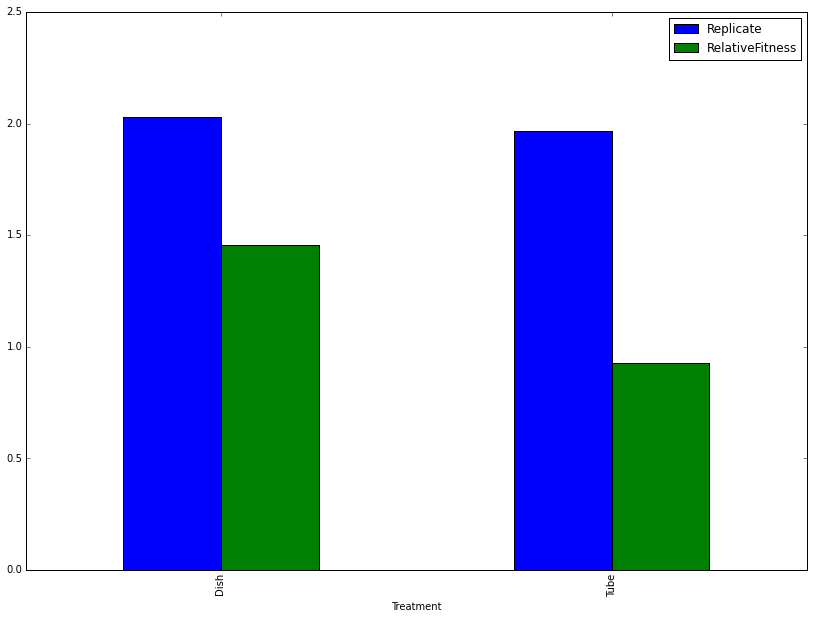

In [14]:
%matplotlib inline
bytreatment.mean().plot.bar(figsize=(14,10))